# Biostat M280 Homework 1

#### Due Apr 27 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

0. Apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

0. Create a **private** repository `biostat-m280-2018-spring` and add `Hua-Zhou` and `LuZhangstat` (TA) as your collaborators.

0. Top directories of the repository should be `hw1`, `hw2`, ... Create two branches `master` and `develop`. The `develop` branch will be your main playground, the place where you develop solution (code) to homework problems and write up report. The `master` branch will be your presentation area. Put your homework submission files (IJulia notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in `master` branch.  

0. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

0. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming by John Myles White. Following rules in the style guide will be strictly enforced when grading: (4), (6), (7), (8), (9), (12), (13) and (16).

## Q2

Let's check whether floating-point numbers obey certain algebraic rules.  
0. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

0. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

0. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

0. Is `0 * x == 0` true for all floating-point number `x`?  

0. Is `x / a == x * (1 / a)` always true?

*(1)* The association rule does not hold in Julia. In mathematics, addition and multiplication of real numbers is associative. But in computer science they are not, as rounding errors are introduced when dissimilar-sized values are joined together. 

In [9]:
x = 0.1
y = 0.1
z = 1.0
(x + y) + z == x + (y + z)

false

*(2)* As demostrated below, multiplication with floating point numbers does not obey the associative rule. In general it depends on the floating-point format, the rounding mode, and the magnitude of the numbers (similar to addition). 

In [10]:
truetimes = 0
falsetimes = 0 
srand(2333)
for i = 1:100
    x = rand()
    y = rand()
    z = rand()
    if (x * y) * z == x * (y * z)
        truetimes += 1
    else
        falsetimes +=1
    end
end
@show truetimes
@show falsetimes

truetimes = 68
falsetimes = 32


32

*(3)* No the distributive law is not obeyed. Same reasoning as in (1)

In [17]:
@show 100 * (0.1 + 0.2) == 100 * 0.1 + 100 * 0.2
@show 100 * (0.1 + 0.2)
@show 100 * 0.1 + 100 * 0.2

100 * (0.1 + 0.2) == 100 * 0.1 + 100 * 0.2 = false
100 * (0.1 + 0.2) = 30.000000000000004
100 * 0.1 + 100 * 0.2 = 30.0


30.0

*(4)* No. For example, when x is the maximum value for Float32 or Float64, multiplying by 0 gives a NaN value

In [18]:
@show 0 * typemax(Float64) == 0
@show 0 * typemax(Float64)

0 * typemax(Float64) == 0 = false
0 * typemax(Float64) = NaN


NaN

*(5)* No, testing  `x / a == x * (1 / a)` is just testing associativity in multiplication so same reasoning as in (2) 

In [23]:
truetimes = 0
falsetimes = 0 
srand(2333)
for i = 1:100
    x = rand()
    a = rand()
    if x / a == x * (1 / a)
        truetimes += 1
    else
        falsetimes +=1
    end
end
@show truetimes
@show falsetimes

truetimes = 71
falsetimes = 29


29

## Q3

Consider Julia function
```julia
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
```
0. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
2. Compare the bitcode from questions 1 and 2. What do you find?  
3. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does macro `@fastmath` do?

(1&2) Find the LLVM bitcode of g with `Int64` and `Float64` input:

In [31]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
@code_llvm g(4)


define i64 @julia_g_62745(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [8]:
@code_llvm g(4.0)


define double @julia_g_62558(double) #0 !dbg !5 {
top:
  %1 = fmul double %0, 5.000000e+00
  %2 = fadd double %1, -1.000000e+00
  %3 = fmul double %2, 5.000000e+00
  %4 = fadd double %3, -1.000000e+00
  %5 = fmul double %4, 5.000000e+00
  %6 = fadd double %5, -1.000000e+00
  %7 = fmul double %6, 5.000000e+00
  %8 = fadd double %7, -1.000000e+00
  %9 = fmul double %8, 5.000000e+00
  %10 = fadd double %9, -1.000000e+00
  %11 = fmul double %10, 5.000000e+00
  %12 = fadd double %11, -1.000000e+00
  %13 = fmul double %12, 5.000000e+00
  %14 = fadd double %13, -1.000000e+00
  %15 = fmul double %14, 5.000000e+00
  %16 = fadd double %15, -1.000000e+00
  %17 = fmul double %16, 5.000000e+00
  %18 = fadd double %17, -1.000000e+00
  %19 = fmul double %18, 5.000000e+00
  %20 = fadd double %19, -1.000000e+00
  ret double %20
}


(3)Compare these two LLVM code, the one for `Int64` input is much shorter because for integer input x, LLVM compiler is smart to know that doing `5k-1` recursively for 10 times is simply multiplying the input number by an integer and than subtracting another integer. While with floating-number input it has to do the loop for 10 times each with a floating-number multiplication and addition.  

(4) As below, now `Int64` and `Float64` inputs have very similar LLVM codes. The macro `@fastmath` allows floating point optimizations that either re-arranges floating point expressions, e.g. changing the order of evaluation, or assuming that certain special cases (inf, nan) cannot occur. 

In [30]:
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
@code_llvm g_fastmath(4)


define i64 @julia_g_fastmath_62744(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [29]:
@code_llvm g_fastmath(4.0)


define double @julia_g_fastmath_62743(double) #0 !dbg !5 {
top:
  %1 = fmul fast double %0, 9.765625e+06
  %2 = fadd fast double %1, -2.441406e+06
  ret double %2
}


## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.  
0. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

1. Plot the polynomial `y = (x - 1)^7` at points `x`.  

2. Explain what you found.

In [9]:
x = collect(0.988:0.001:1.012)
y = x.^7 - 7x.^6 + 21x.^5 - 35x.^4 + 35x.^3 - 21x.^2 + 7x -1;
z = (x - 1).^7;

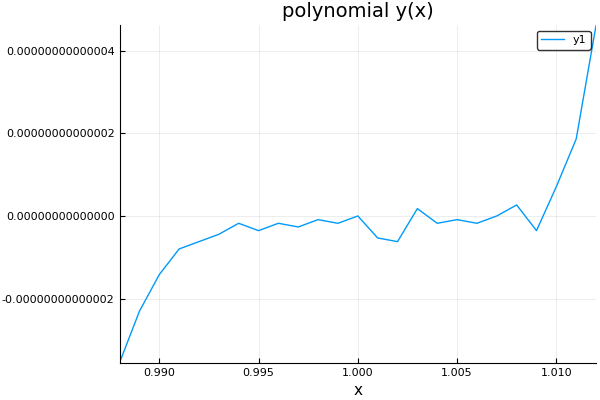

In [10]:
using Plots
pyplot()  # set the backend to PyPlot
plot(x,y, title="polynomial y(x)", xlab="x")

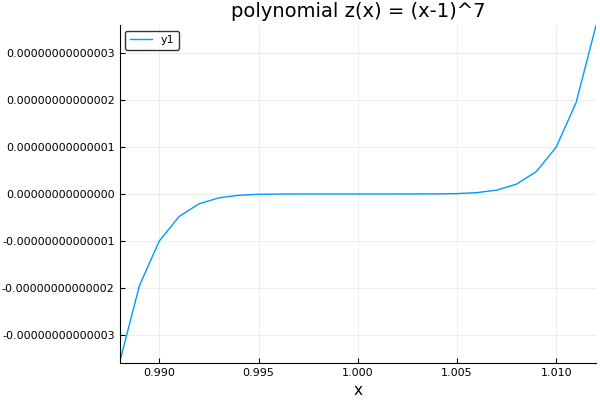

In [43]:
plot(x, z, title="polynomial z(x) = (x-1)^7", xlab="x")

Mathematically the two polynomials are equal. But with rounding error from floating-point number arithmetic operations, the value used for plotting is actually different, which is obvious from the above plots. Also we can check the difference between `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` and `(x - 1)^7` as below:

In [11]:
z - y

25-element Array{Float64,1}:
 -3.04671e-16
  3.60547e-15
  4.21085e-15
  3.21064e-15
  4.1201e-15 
  3.61735e-15
  1.49642e-15
  3.47459e-15
  1.75997e-15
  2.66235e-15
  8.8805e-16 
  1.77636e-15
  0.0        
  5.32907e-15
  6.21738e-15
 -1.77417e-15
  1.79274e-15
  9.66303e-16
  2.05629e-15
  8.23543e-16
 -5.67383e-16
  8.33568e-15
  2.89457e-15
  8.35424e-16
 -1.03535e-14

## Q5

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  
0. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 3 ways, e.g., looping, [comprehension](https://docs.julialang.org/en/stable/manual/arrays/#Comprehensions-1), and vectorization. Compute and print `H` for `n = 5`.   
0. Compare their efficiencies at `n = 1000`.
0. Try different rounding modes (use function `setrounding(Float64, RoundingMode)`) and report the entry `inv(H)[1, 1]` for `n = 15`.

(1)

In [138]:
function h_loop(n::Int64)
    matrix = Array{Float64}(n, n);
    for i = 1:n
        for j = 1:n
            matrix[i,j] = 1 / (i + j - 1)
        end
    end
    matrix
end

h_loop (generic function with 2 methods)

In [139]:
h_loop(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [140]:
function h_comprehension(n::Int64)
 [(1/ (i + j - 1)) for i = 1:n, j = 1:n]
end

h_comprehension (generic function with 2 methods)

In [141]:
h_comprehension(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [142]:
function h_vectorization(n::Int64)
    t = [(i) for i in 1:n, j in 1:n]
    1./(t + t' - 1)
end

h_vectorization (generic function with 2 methods)

In [143]:
h_vectorization(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

(2) Compare efficiencies. The results showed that in our case by looping or comprehension is more efficient than vectorization.

In [144]:
using BenchmarkTools
@benchmark h_loop(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     3.528 ms (0.00% GC)
  median time:      4.098 ms (0.00% GC)
  mean time:        5.354 ms (25.09% GC)
  maximum time:     10.558 ms (57.82% GC)
  --------------
  samples:          932
  evals/sample:     1

In [145]:
@benchmark h_comprehension(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     3.809 ms (0.00% GC)
  median time:      4.561 ms (0.00% GC)
  mean time:        5.638 ms (21.78% GC)
  maximum time:     10.959 ms (55.25% GC)
  --------------
  samples:          886
  evals/sample:     1

In [146]:
@benchmark h_vectorization(1000)

BenchmarkTools.Trial: 
  memory estimate:  38.15 MiB
  allocs estimate:  10
  --------------
  minimum time:     14.211 ms (0.00% GC)
  median time:      21.884 ms (32.80% GC)
  mean time:        22.900 ms (35.32% GC)
  maximum time:     155.431 ms (89.85% GC)
  --------------
  samples:          219
  evals/sample:     1

(3)Set rounding mode to `RoundUp`, `RoundDown`, `RoundNearest`, and use `h_loop` to get matrix `H` and the `[1,1]` entry of its inverse. As shown below, different rounding modes have a big influence on the result value.

In [149]:
setrounding(Float64, RoundUp)
@show inv(h_loop(15))[1, 1]
setrounding(Float64, RoundDown)
@show inv(h_loop(15))[1, 1]
setrounding(Float64, RoundNearest)
@show inv(h_loop(15))[1, 1]

(inv(h_loop(15)))[1, 1] = 143.33204964422663
(inv(h_loop(15)))[1, 1] = 170.8042035849141
(inv(h_loop(15)))[1, 1] = 153.80740916033488


153.80740916033488

## Q6

0. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

0. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

0. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

0. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**(1 & 2 & 3)**  In terms of generality, **binomial inversion formula** > **Woodbury formula**> **Sherman-Morrison formula**. So we can prove **binomial inversion formula** and generalize it to the other two cases.

\begin{align}
& \left(A+UBV^T \right) \left[ A^{-1} - A^{-1}U \left(B^{-1}+V^TA^{-1}U \right)^{-1} V^TA^{-1} \right] \\
= {} & \left \{ I - U\left(B^{-1}+V^TA^{-1}U \right)^{-1}V^T A^{-1} \right \} +  \left \{ UBV^T A^{-1} - UBV^T A^{-1}U \left(B^{-1}+V^T A^{-1}U \right)^{-1} V^T A^{-1}  \right \} \\
= {} & \left \{  I + UBV^T A^{-1} \right \} - \left \{ U\left(B^{-1}+V^T A^{-1}U \right)^{-1}V^T A^{-1} + UBV^T A^{-1}U \left(B^{-1}+V^T A^{-1}U \right)^{-1} V^T A^{-1} \right \} \\
= {} & I + UBV^T A^{-1} - \left  (U+UBV^T A^{-1}U \right ) \left (B^{-1} + V^T A^{-1}U \right )^{-1}V^T A^{-1} \\
= {} & I + UBV^T A^{-1} - UB \left (B^{-1}+ V^T A^{-1}U \right ) \left (B^{-1} + V^T A^{-1}U \right )^{-1}V^T A^{-1} \\
= {} & I + UBV^T A^{-1} - UBV^T A^{-1} \\
= {} & I.
\end{align}

When $B = I_m$ we can get **Woodbury formula**. Then set m = 1 and U = V, it leads to **Sherman-Morrison formula**.

(4) This is known as the **matrix determinant lemma**. 

We can begin with $ \pmatrix{I+UV^T&0\\ 0&I} $ and use elementary row and column operations to eliminate the $UV^T$ in the upper left submatrix. (To ease the notation, $I$ is used for identity matrix with compatible dimensions.  

\begin{align*}
\pmatrix{I+UV^T&0\\ 0&I}\pmatrix{I&0\\ -V^T&I}&=\pmatrix{I+UV^T&0\\ -V^T&I},\\
\pmatrix{I&U\\ 0&I}\pmatrix{I+UV^T&0\\ -V^T&I}&=\pmatrix{I&U\\ -V^T&I},\\
\pmatrix{I&0\\ V^T&I}\pmatrix{I&U\\ -V^T&I}&=\pmatrix{I&U\\ 0&I+V^TU}.
\end{align*}

Put them together, 
$$ \pmatrix{I&0\\ V^T&I}\pmatrix{I+UV^T&U\\ 0&I}\pmatrix{I&0\\ -V^T&I}=\pmatrix{I&U\\ 0&I+V^TU}. $$

The determinant of the LHS is the product of three determinants. Since the first and third matrix are triangle matrices with unit diagonal, their determinants are just 1. So 

$$\det(I_{n \times n} + UV^T) = \det(I_{m \times m} + V^TU)$$

\begin{align}
\det(A + UV^T) &= \det(A) \det(I_{n \times n} + A^{-1} UV^T) \\
& = \det(A) \det(I_{n \times n} + (A^{-1} U)V^T) \\
&= \det(A) \det(I_{m \times m} + V^TA^{-1} U).
\end{align}

If the **determinant and inverse** of $A$ are already known, the formula provides a numerically cheap way to compute the determinant of $A$ corrected by the matrix $U V^T$. 